In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
# Load the dataset (assuming you have a CSV file with 'datetime' and 'temperature' columns)
springData = pd.read_csv("../datasets/springData.csv")
fallData = pd.read_csv("../datasets/fallData.csv")
data = pd.concat([springData, fallData])

# Convert the 'datetime' column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'], format='%d/%m/%y %H:%M')

# Extract features from the datetime column
data['timestamp'] = data['datetime'].astype(int) // 10**9
# print(data['datetime'][1])

In [5]:
# Split the dataset into features (X) and target variable (y)
X = data[['timestamp']]
y = data['t2m']
# Initialize and fit the linear regression model
model = RandomForestRegressor(n_estimators=100)
model.fit(X.values, y)

RandomForestRegressor()

In [12]:
linearModel = LinearRegression()
linearModel.fit(X.values, y)

LinearRegression()

In [27]:
# Predict the temperature for a given datetime
new_datetime = pd.to_datetime('28/04/2030 16:30', format='%d/%m/%Y %H:%M')
new_timestamp = new_datetime.timestamp()
new_temperature = linearModel.predict([[new_timestamp]])

print('date:', pd.to_datetime(new_datetime, format='%d/%m/%Y %H:%M') ,'Predicted temperature:', new_temperature[0], 'Kelvin')

date: 2030-04-28 16:30:00 Predicted temperature: 285.0690138371041 Kelvin


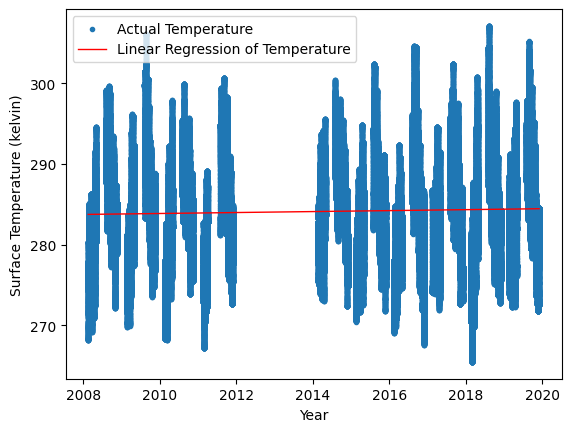

In [24]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Surface Temperature (kelvin)')
plt.scatter(data['datetime'], data['t2m'], marker='.', label='Actual Temperature')
plt.plot(data['datetime'], linearModel.predict(X.values), color='red', linewidth=1, label='Linear Regression of Temperature')
plt.savefig('../output-results/riseOfSurfaceTemperature.png')
plt.legend(loc=2)

plt.show()